In [22]:
from ctgan import CTGAN
from ctgan import load_demo
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
from scipy.sparse import vstack
# import standard scaler
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon
from sdv.single_table import CTGANSynthesizer







In [15]:
import sdv
print(sdv.__version__)


1.18.0


In [11]:
pip install --upgrade sdv


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip install sdv


  Using cached sdv-1.18.0-py3-none-any.whl.metadata (13 kB)
Using cached sdv-1.18.0-py3-none-any.whl (156 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


After upgrading, check if CTGAN is available:

In [21]:
from sdv.single_table import CTGANSynthesizer


In [23]:
try:
    from sdv.single_table import CTGANSynthesizer
    print("CTGAN successfully imported!")
except ImportError as e:
    print(f"Error importing CTGAN: {e}")


CTGAN successfully imported!


In [2]:
path = r"D:\model_testing\CT_gan\CTGAN\data\fraudTrain.csv"
fraud_train = pd.read_csv(path)
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
path_test = r"D:\model_testing\CT_gan\CTGAN\data\fraudTest.csv"
fraud_test = pd.read_csv(path_test)
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_train = fraud_train.copy()

In [5]:
df_test = fraud_test.copy()

<!-- # [Data Preprocessing]() -->

In [6]:
def preprocessing(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)
    dataframe.reset_index(drop=True, inplace=True)
    dataframe.drop(columns=['Unnamed: 0'], inplace=True)
    dataframe['merchant'] = dataframe['merchant'].str.strip('fraud_')
    dataframe['trans_date_trans_time'] = pd.to_datetime(dataframe['trans_date_trans_time'])
    dataframe['dob'] = pd.to_datetime(dataframe['dob'])
    dataframe['year_month'] = dataframe['trans_date_trans_time'].dt.to_period('M')
    dataframe['day_of_week'] = dataframe['trans_date_trans_time'].dt.day_name()
    dataframe['transaction_hour'] = dataframe['trans_date_trans_time'].dt.hour
    dataframe['age'] = (dataframe['trans_date_trans_time'].dt.year - dataframe['dob'].dt.year).astype(int)
    
    return dataframe
data = preprocessing(df_train.copy())
display(data.shape)

(1296675, 26)

In [7]:
drop_cols = ['trans_date_trans_time','cc_num','unix_time','lat',
              'long','merch_lat','merch_long','dob','city','street','merchant',
             'zip','first','last','trans_num','job']

In [8]:
data1 = data.drop(columns=drop_cols)

In [9]:
data2 = preprocessing(df_test.copy()).drop(columns=drop_cols)

In [10]:
data1.head()


,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,transaction_hour,age
0,misc_net,4.97,F,NC,3495,0,2019-01,Tuesday,0,31
1,grocery_pos,107.23,F,WA,149,0,2019-01,Tuesday,0,41
2,entertainment,220.11,M,ID,4154,0,2019-01,Tuesday,0,57
3,gas_transport,45.00,M,MT,1939,0,2019-01,Tuesday,0,52
4,misc_pos,41.96,M,VA,99,0,2019-01,Tuesday,0,33


In [11]:
data2.head()

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,transaction_hour,age
0,personal_care,2.86,M,SC,333497,0,2020-06,Sunday,12,52
1,personal_care,29.84,F,UT,302,0,2020-06,Sunday,12,30
2,health_fitness,41.28,F,NY,34496,0,2020-06,Sunday,12,50
3,misc_pos,60.05,M,FL,54767,0,2020-06,Sunday,12,33
4,travel,3.19,M,MI,1126,0,2020-06,Sunday,12,65


In [12]:
len(data1) / len(data2)

2.333328534745078

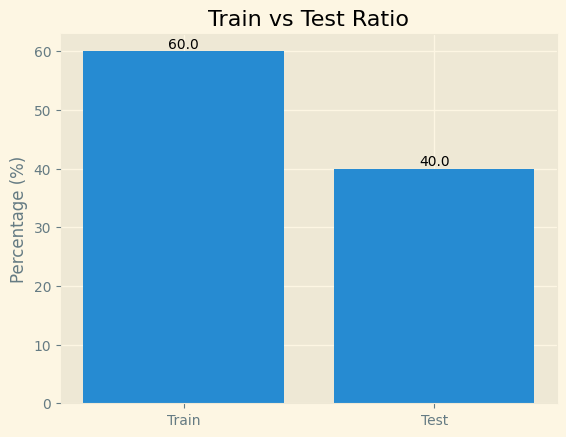

In [95]:
train_percentage = 100 - 100 * round(len(data2) / len(data1), 1)
test_percentage = 100 * round(len(data2) / len(data1), 1)
plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.ylabel('Percentage (%)')
plt.title('Train vs Test Ratio')
for i, v in enumerate([train_percentage, test_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Genuine: 1289169 and 99.42 % of the dataset
Frauds: 7506 and 0.58 % of the dataset


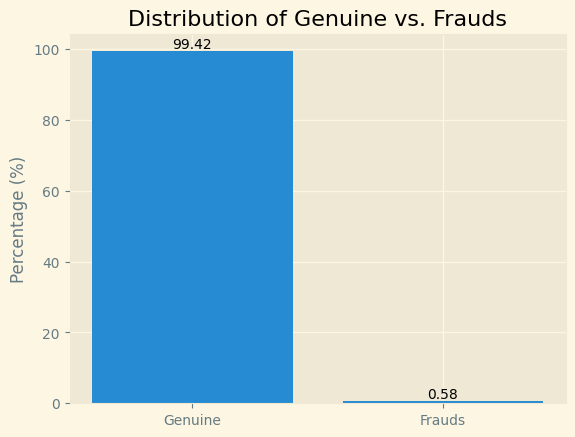

In [14]:
# Tính phần trăm số lượng giao dịch không gian lận và giao dịch gian lận trong tập dữ liệu
genuine_percentage = round((data1['is_fraud'].value_counts()[0] / len(data1)) * 100, 2)
fraud_percentage = round((data1['is_fraud'].value_counts()[1] / len(data1)) * 100, 2)

# In ra số lượng giao dịch không gian lận và giao dịch gian lận cùng với phần trăm tương ứng
print('Genuine:', data1['is_fraud'].value_counts()[0], 'and', genuine_percentage, '% of the dataset')
print('Frauds:', data1['is_fraud'].value_counts()[1], 'and', fraud_percentage, '% of the dataset')

# Vẽ biểu đồ cột để thể hiện phân phối giữa giao dịch không gian lận và giao dịch gian lận
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Frauds')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

<!-- 
# [Features extraction]() -->

In [15]:
def apply_feature_engineering(df):
    df["category"] = df["category"].astype("category").cat.codes
    df["gender"] = df["gender"].astype("category").cat.codes
    df["state"] = df["state"].astype("category").cat.codes
    df["year_month"] = df["year_month"].astype("category").cat.codes
    df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
    
    return df

In [16]:
data_transformed_1 = apply_feature_engineering(data1.copy())
data_transformed_2 = apply_feature_engineering(data2.copy())

In [17]:
display(data_transformed_1.head(2))
display(data_transformed_2.head(2))

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,transaction_hour,age
0,8,4.97,0,27,3495,0,0,5,0,31
1,4,107.23,0,47,149,0,0,5,0,41


,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,transaction_hour,age
0,10,2.86,1,39,333497,0,0,3,12,52
1,10,29.84,0,43,302,0,0,3,12,30


<!-- # [Train test split]()  -->

In [18]:
X_train = data_transformed_1.drop(columns=['is_fraud'], axis=1)
X_test = data_transformed_2.drop(columns=['is_fraud'], axis=1)
y_train = data_transformed_1['is_fraud']
y_test = data_transformed_2['is_fraud']

In [19]:
scaler = StandardScaler()
numerical_cols = ['amt', 'city_pop', 'age']

scaled_features = scaler.fit_transform(X_train[numerical_cols])
X_train_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled_features], axis=1)

scaled_features = scaler.fit_transform(X_test[numerical_cols])
X_test_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled_features], axis=1)

In [20]:
X_train

,category,gender,state,year_month,day_of_week,transaction_hour,amt,city_pop,age
0,8,0,27,0,5,0,-0.407826,-0.282589,-0.864629
1,4,0,47,0,5,0,0.230039,-0.293670,-0.289333
2,0,1,13,0,5,0,0.934149,-0.280406,0.631140
3,2,1,26,0,5,0,-0.158132,-0.287742,0.343492
4,9,1,45,0,5,0,-0.177094,-0.293835,-0.749570
...,...,...,...,...,...,...,...,...,...
1296670,0,1,44,17,3,12,-0.341769,-0.293309,0.746199
1296671,1,1,20,17,3,12,-0.116339,-0.293832,-0.289333
1296672,1,1,32,17,3,12,0.221930,-0.291186,0.401021
1296673,1,1,41,17,3,12,0.028375,-0.290434,-0.346863


## [Random OverSampling]()

In [98]:
from imblearn.over_sampling import RandomOverSampler
# import shuffle
from sklearn.utils import shuffle
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [22]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [23]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 1289169 / 50.0 % of the dataset
Frauds: 1289169 / 50.0 % of the dataset


In [99]:
X_over, y_over = shuffle(X_over, y_over, random_state=42)

## [CTGAN]()

In [24]:
categorical_features = ['category','gender','state','year_month','day_of_week', 'transaction_hour', 'is_fraud']


In [25]:
df_fraud = pd.concat([X_train, y_train], axis=1)
df_fraud = df_fraud[df_fraud['is_fraud'] == 1]

In [26]:
# df_fraud.shape

In [27]:
df_fraud.head()

,category,gender,state,year_month,day_of_week,transaction_hour,amt,city_pop,age,is_fraud
2449,4,1,27,0,6,1,1.314335,-0.291232,-0.864629,1
2472,2,0,43,0,6,1,-0.366969,4.990698,0.746199,1
2523,4,0,43,0,6,3,1.284706,4.990698,0.746199,1
2546,2,1,27,0,6,3,-0.394976,-0.291232,-0.864629,1
2553,4,0,43,0,6,3,1.281089,4.990698,0.746199,1


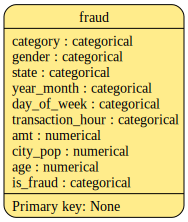

In [28]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df_fraud,
    table_name='fraud')

metadata.update_column(
    column_name='city_pop', 
    sdtype='numerical'      
)

metadata.update_column(
    column_name='transaction_hour', 
    sdtype='categorical'      
)
metadata.update_column(
    column_name='year_month', 
    sdtype='categorical'      
)
metadata.update_column(
    column_name='state', 
    sdtype='categorical'      
)
metadata.update_column(
    column_name='category', 
    sdtype='categorical'      
)

metadata.visualize()

In [29]:

# synthesizer = CTGANSynthesizer(metadata, cuda=True)
# synthesizer.fit(df_fraud)

In [30]:
# synthesizer.version_info = {https://www.facebook.com/stories/2045623668786949/UzpfSVNDOjkwOTA1NzA2Nzk3OTg2MA==/?bucket_count=9&source=story_tray
#     "numpy_version": np.__version__,
#     "python_version": sys.version,
# }
# synthesizer.save('synthesizer_check.pkl')

In [31]:
synthesizer = CTGANSynthesizer.load('synthesizer_check.pkl')
print("Model loaded successfully")

Model loaded successfully


In [32]:
sample = synthesizer.sample(1281663)

In [33]:
sample.head()

,category,gender,state,year_month,day_of_week,transaction_hour,amt,city_pop,age,is_fraud
0,4,1,45,14,5,0,1.499189,-0.294087,-0.643720,1
1,12,0,40,11,3,23,5.493603,-0.294087,0.009975,1
2,4,1,7,10,1,1,1.451047,-0.232554,0.067190,1
3,12,0,38,1,1,23,4.431379,-0.287409,-0.412842,1
4,4,0,44,16,2,3,1.458523,-0.283182,0.444603,1


In [34]:
X_ctgan = pd.concat([X_train, sample.drop(columns=sample.columns[-1], axis=1)], axis=0)
y_ctgan = pd.concat([y_train, sample['is_fraud']], axis=0)

In [35]:
y_ctgan.value_counts()

is_fraud
0    1289169
1    1107506
Name: count, dtype: int64

Genuine: 1289169 and 53.79 % of the dataset
Frauds: 1107506 and 46.21 % of the dataset


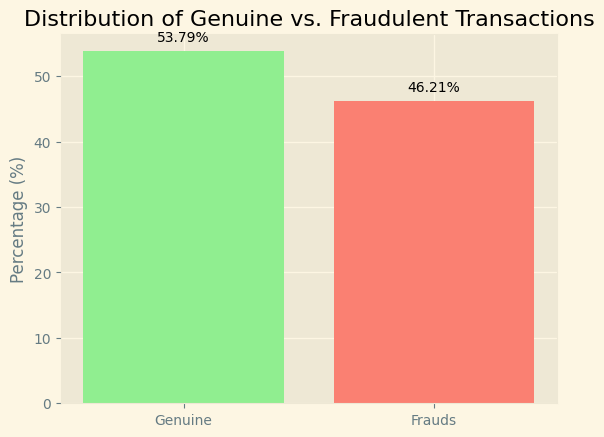

In [36]:
genuine_count = y_ctgan.value_counts()[0]
fraud_count = y_ctgan.value_counts()[1]
total_count = len(y_ctgan)

genuine_percentage = round((genuine_count / total_count) * 100, 2)
fraud_percentage = round((fraud_count / total_count) * 100, 2)

print('Genuine:', genuine_count, 'and', genuine_percentage, '% of the dataset')
print('Frauds:', fraud_count, 'and', fraud_percentage, '% of the dataset')
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage], color=['lightgreen', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Fraudulent Transactions')
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v + 1, f'{v}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
X_ctgan, y_ctgan = shuffle(X_ctgan, y_ctgan, random_state=42)

## [SMOTE]()

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [38]:
# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Genuine: 1289169 / 50.0 % of the dataset
Frauds: 1289169 / 50.0 % of the dataset


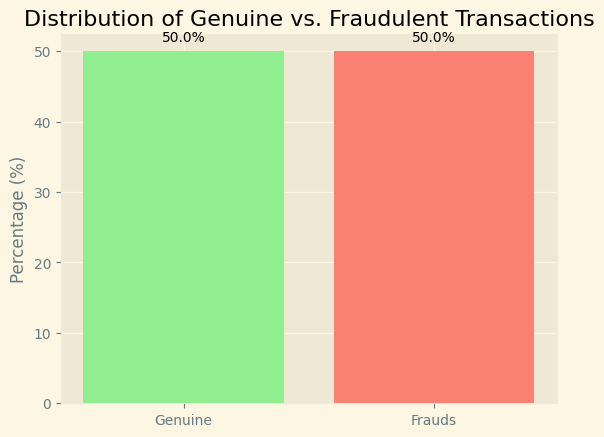

In [96]:
print('Genuine:', y_smote.value_counts()[0], '/', round(y_smote.value_counts()[0]/len(y_smote) * 100,2), '% of the dataset')
print('Frauds:', y_smote.value_counts()[1], '/',round(y_smote.value_counts()[1]/len(y_smote) * 100,2), '% of the dataset')
genuine_count = y_smote.value_counts()[0]
fraud_count = y_smote.value_counts()[1]
total_count = len(y_smote)

genuine_percentage = round((genuine_count / total_count) * 100, 2)
fraud_percentage = round((fraud_count / total_count) * 100, 2)
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage], color=['lightgreen', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Fraudulent Transactions')
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v + 1, f'{v}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
X_smote, y_smote = shuffle(X_smote, y_smote, random_state=42)

## [Random Undersampling Imbalanced Datasets]()


In [97]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')
X_under, y_under = shuffle(X_under, y_under, random_state=42)

Genuine: 7506 / 50.0 % of the dataset
Frauds: 7506 / 50.0 % of the dataset


In [ ]:
X_under, y_under = shuffle(X_under, y_under, random_state=42)

## [Model training]()

In [41]:

from typing import Dict
import pandas as pd

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_score,
    recall_score, auc, confusion_matrix, precision_recall_curve
)
from xgboost import XGBClassifier

In [42]:
def create_pipelines() -> Dict[str, Pipeline]:
    pipelines = {
        'K-Nearest Neighbors Classifier': make_pipeline(KNeighborsClassifier()),
        'Logistic Regression': make_pipeline(LogisticRegression()),
        'Random Forest Classifier': make_pipeline(RandomForestClassifier()),
        'XGBoost Classifier': make_pipeline(XGBClassifier())  # Thêm XGBoost
    }
    return pipelines

In [44]:
def metrics_from_pipelines(
    pipelines: Dict[str, Pipeline],
    x_train: pd.DataFrame,
    y_train: pd.Series,
    x_test: pd.DataFrame,
    y_test: pd.Series
):
    """
    Train các pipeline truyền vào trên (x_train, y_train),
    dự đoán trên (x_train, x_test),
    rồi tính toàn bộ chỉ số đánh giá (accuracy, f1, roc_auc, pr_auc, v.v.)
    cho cả train và test set, trả về bảng so sánh dạng Styler.

    Đồng thời tính thêm Geometric Mean (G-Mean).

    Parameters
    ----------
    pipelines : Dict[str, Pipeline]
        Từ điển {"model_name": pipeline_object}
    x_train : pd.DataFrame
        Dữ liệu đầu vào cho train
    y_train : pd.Series
        Nhãn (target) cho train
    x_test : pd.DataFrame
        Dữ liệu đầu vào cho test
    y_test : pd.Series
        Nhãn (target) cho test

    Returns
    -------
    pd.io.formats.style.Styler
        Bảng so sánh các chỉ số đánh giá (train + test) dưới dạng Styler
    """

    # Các list lưu metric cho train
    train_accs = []
    train_f1s = []
    train_roc_aucs = []
    train_pr_aucs = []
    train_precs = []
    train_recs = []
    train_specs = []
    train_fprs_list = []
    train_fnrs_list = []
    train_gmeans = []  # <= LIST CHỨA GMEAN CỦA TRAIN

    # Các list lưu metric cho test
    test_accs = []
    test_f1s = []
    test_roc_aucs = []
    test_pr_aucs = []
    test_precs = []
    test_recs = []
    test_specs = []
    test_fprs_list = []
    test_fnrs_list = []
    test_gmeans = []  # <= LIST CHỨA GMEAN CỦA TEST

    # Lặp qua từng pipeline
    for name, pipeline in pipelines.items():
        # Train pipeline
        pipeline.fit(x_train, y_train)

        # Dự đoán train/test
        y_pred_train = pipeline.predict(x_train)
        y_pred_test = pipeline.predict(x_test)

        # Xác suất (prob) để tính ROC AUC, PR AUC
        y_probs_train = pipeline.predict_proba(x_train)[:, 1]
        y_probs_test = pipeline.predict_proba(x_test)[:, 1]

        # Tính precision/recall curve cho train/test
        train_precisions, train_recalls, _ = precision_recall_curve(y_train, y_probs_train)
        test_precisions, test_recalls, _ = precision_recall_curve(y_test, y_probs_test)

        # Ma trận nhầm lẫn (confusion matrix)
        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

        # Tính các chỉ số cho train
        acc_train = accuracy_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)
        roc_train = roc_auc_score(y_train, y_probs_train)
        pr_train = auc(train_recalls, train_precisions)
        prec_train = precision_score(y_train, y_pred_train)
        rec_train = recall_score(y_train, y_pred_train)
        spec_train = tn_train / (tn_train + fp_train)
        fpr_train = fp_train / (fp_train + tn_train)
        fnr_train = fn_train / (fn_train + tp_train)
        gmean_train = np.sqrt(rec_train * spec_train)  # TÍNH GMEAN TRAIN

        # Tính các chỉ số cho test
        acc_test = accuracy_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        roc_test = roc_auc_score(y_test, y_probs_test)
        pr_test = auc(test_recalls, test_precisions)
        prec_test = precision_score(y_test, y_pred_test)
        rec_test = recall_score(y_test, y_pred_test)
        spec_test = tn_test / (tn_test + fp_test)
        fpr_test = fp_test / (fp_test + tn_test)
        fnr_test = fn_test / (fn_test + tp_test)
        gmean_test = np.sqrt(rec_test * spec_test)  # TÍNH GMEAN TEST

        # Lưu metric cho train
        train_accs.append(acc_train)
        train_f1s.append(f1_train)
        train_roc_aucs.append(roc_train)
        train_pr_aucs.append(pr_train)
        train_precs.append(prec_train)
        train_recs.append(rec_train)
        train_specs.append(spec_train)
        train_fprs_list.append(fpr_train)
        train_fnrs_list.append(fnr_train)
        train_gmeans.append(gmean_train)

        # Lưu metric cho test
        test_accs.append(acc_test)
        test_f1s.append(f1_test)
        test_roc_aucs.append(roc_test)
        test_pr_aucs.append(pr_test)
        test_precs.append(prec_test)
        test_recs.append(rec_test)
        test_specs.append(spec_test)
        test_fprs_list.append(fpr_test)
        test_fnrs_list.append(fnr_test)
        test_gmeans.append(gmean_test)

    # Tạo DataFrame các chỉ số train
    train_metrics = pd.DataFrame({
        'model': pipelines.keys(),
        'accuracy': train_accs,
        'f1_score': train_f1s,
        'roc_auc': train_roc_aucs,
        'pr_auc': train_pr_aucs,
        'precision': train_precs,
        'recall': train_recs,
        'specificity': train_specs,
        'false_positive_rate': train_fprs_list,
        'false_negative_rate': train_fnrs_list,
        'gmean': train_gmeans
    })

    # Tạo DataFrame các chỉ số test
    test_metrics = pd.DataFrame({
        'model': pipelines.keys(),
        'accuracy': test_accs,
        'f1_score': test_f1s,
        'roc_auc': test_roc_aucs,
        'pr_auc': test_pr_aucs,
        'precision': test_precs,
        'recall': test_recs,
        'specificity': test_specs,
        'false_positive_rate': test_fprs_list,
        'false_negative_rate': test_fnrs_list,
        'gmean': test_gmeans
    })

    # Gộp hai bảng train và test
    train_test_metrics = train_metrics.merge(
        test_metrics,
        on='model',
        how='left',
        suffixes=('_train', '_test')
    )

    # Sắp xếp lại thứ tự cột
    columns_order = [
        'model',
        'accuracy_train', 'accuracy_test',
        'f1_score_train', 'f1_score_test',
        'roc_auc_train', 'roc_auc_test',
        'pr_auc_train', 'pr_auc_test',
        'precision_train', 'precision_test',
        'recall_train', 'recall_test',
        'specificity_train', 'specificity_test',
        'false_positive_rate_train', 'false_positive_rate_test',
        'false_negative_rate_train', 'false_negative_rate_test',
        'gmean_train', 'gmean_test'  # Thêm hai cột G-Mean
    ]
    train_test_metrics = train_test_metrics.reindex(columns=columns_order)

    # Trả về kết quả dạng Styler
    return (
        train_test_metrics
        .set_index('model')
        .transpose()
        .style
        .background_gradient(cmap='BuGn')
        .set_properties(**{'font-size': '10pt', 'text-align': 'center'})
        .set_caption('Table 4. Model Performance Metrics (kèm G-Mean)')
    )


### [Train with imbalanced data]()

In [45]:
from joblib import dump
pipelines_imbalanced = create_pipelines()
styled_metrics_imbalanced = metrics_from_pipelines(
    pipelines_imbalanced,
    X_train, y_train,
    X_test, y_test
)
styled_metrics_imbalanced 

for name, pipe in pipelines_imbalanced.items():
    dump(pipe, f"{name}_model_imbalanced.joblib")

In [46]:
styled_metrics_imbalanced

model,K-Nearest Neighbors Classifier,Logistic Regression,Random Forest Classifier,XGBoost Classifier
accuracy_train,0.996724,0.993653,0.999998,0.999301
accuracy_test,0.997036,0.995474,0.998946,0.998843
f1_score_train,0.632399,0.000000,0.999867,0.936652
f1_score_test,0.481586,0.000000,0.849744,0.836345
roc_auc_train,0.998626,0.829667,1.000000,0.999823
roc_auc_test,0.775566,0.823847,0.980608,0.997228
pr_auc_train,0.843063,0.177021,1.000000,0.984065
pr_auc_test,0.453519,0.126284,0.878965,0.885394
precision_train,0.902222,0.000000,1.000000,0.985580
precision_test,0.741279,0.000000,0.944160,0.920964


### [Train after apply CTGAN]()

In [47]:
pipelines_ctgan = create_pipelines()
styled_metrics_ctgan = metrics_from_pipelines(
    pipelines_ctgan,
    X_ctgan, y_ctgan,
    X_test, y_test
)
styled_metrics_ctgan
for name, pipe in pipelines_imbalanced.items():
    dump(pipe, f"{name}_model_ctgan.joblib")

In [48]:
styled_metrics_ctgan

model,K-Nearest Neighbors Classifier,Logistic Regression,Random Forest Classifier,XGBoost Classifier
accuracy_train,0.937250,0.834187,0.999999,0.988247
accuracy_test,0.916667,0.912342,0.969418,0.726675
f1_score_train,0.929892,0.795764,0.999999,0.987200
f1_score_test,0.070566,0.061714,0.185712,0.026184
roc_auc_train,0.988032,0.845446,1.000000,0.999054
roc_auc_test,0.927372,0.833959,0.981751,0.961957
pr_auc_train,0.987276,0.866309,1.000000,0.999048
pr_auc_test,0.413841,0.137238,0.749474,0.644218
precision_train,0.961198,0.923547,1.000000,0.993675
precision_test,0.036870,0.032187,0.103492,0.013274


### [Training after apply SMOTE]()

In [49]:
pipelines_smote = create_pipelines()
styled_metrics_smote = metrics_from_pipelines(
    pipelines_smote,
    X_smote, y_smote,
    X_test, y_test
)
styled_metrics_smote
for name, pipe in pipelines_smote.items():
    dump(pipe, f"{name}_model_smote.joblib")

In [50]:
styled_metrics_smote

model,K-Nearest Neighbors Classifier,Logistic Regression,Random Forest Classifier,XGBoost Classifier
accuracy_train,0.993690,0.852946,1.000000,0.987674
accuracy_test,0.972945,0.906773,0.994630,0.900975
f1_score_train,0.993729,0.840917,1.000000,0.987641
f1_score_test,0.150037,0.059985,0.555688,0.069874
roc_auc_train,0.999995,0.890215,1.000000,0.999298
roc_auc_test,0.822176,0.860833,0.982860,0.986613
pr_auc_train,0.999995,0.909191,1.000000,0.999321
pr_auc_test,0.320041,0.140261,0.816558,0.784262
precision_train,0.987579,0.915826,1.000000,0.990246
precision_test,0.085371,0.031207,0.408226,0.036251


### [Training after apply random oversampling]()

In [100]:
pipelines_over = create_pipelines()
styled_metrics_over = metrics_from_pipelines(
    pipelines_over,
    X_over, y_over,
    X_test, y_test
)
styled_metrics_smote
for name, pipe in pipelines_over.items():
    dump(pipe, f"{name}_model_over.joblib")

In [ ]:
styled_metrics_over

model,K-Nearest Neighbors Classifier,Logistic Regression,Random Forest Classifier,XGBoost Classifier
accuracy_train,0.998357,0.853105,1.000000,0.997109
accuracy_test,0.992615,0.936723,0.998892,0.993373
f1_score_train,0.998360,0.837534,1.000000,0.997117
f1_score_test,0.347328,0.084366,0.845846,0.520130
roc_auc_train,1.000000,0.855740,1.000000,0.999892
roc_auc_test,0.775231,0.848631,0.984738,0.997366
pr_auc_train,1.000000,0.891302,1.000000,0.999886
pr_auc_test,0.383595,0.144330,0.890150,0.887484
precision_train,0.996725,0.936842,1.000000,0.994251
precision_test,0.263577,0.044679,0.913020,0.360940


: 

In [63]:
columns_to_drop = ['accuracy_train', 'accuracy_test','roc_auc_train', 'roc_auc_test', 'pr_auc_train', 'pr_auc_test', 'false_positive_rate_train', 'false_positive_rate_test', 'false_negative_rate_train', 'false_negative_rate_test']
styled_metrics_imbalanced.data.T.drop(columns=columns_to_drop).index.map(lambda x: x + " - Random Oversampling")


Index(['K-Nearest Neighbors Classifier - Random Oversampling',
       'Logistic Regression - Random Oversampling',
       'Random Forest Classifier - Random Oversampling',
       'XGBoost Classifier - Random Oversampling'],
      dtype='object', name='model')

In [64]:
def transform_styled_df(styled_df, columns_to_drop, index_suffix=""):
    df = styled_df.data
    df = df.T
    if columns_to_drop:
        df = df.drop(columns=columns_to_drop, errors="ignore")
    df.index = df.index.map(lambda x: x + index_suffix)
    return df

In [66]:
metrics_imbalanced_df = transform_styled_df(styled_metrics_imbalanced, columns_to_drop=columns_to_drop, index_suffix="- Imbalanced")
metrics_ctgan_df = transform_styled_df(styled_metrics_ctgan, columns_to_drop=columns_to_drop, index_suffix="- CTGAN")
metrics_smote_df = transform_styled_df(styled_metrics_smote, columns_to_drop=columns_to_drop, index_suffix="- SMOTE")
metrics_over_df = transform_styled_df(styled_metrics_over, columns_to_drop=columns_to_drop, index_suffix="- Random Oversampling")

In [79]:
all_metrics_df = pd.concat([metrics_imbalanced_df, metrics_ctgan_df, metrics_smote_df, metrics_over_df])
all_metrics_df = all_metrics_df.round(4)
all_metrics_df


,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test,specificity_train,specificity_test,gmean_train,gmean_test
model,,,,,,,,,,
K-Nearest Neighbors Classifier- Imbalanced,0.6324,0.4816,0.9022,0.7413,0.4868,0.3566,0.9997,0.9995,0.6976,0.5971
Logistic Regression- Imbalanced,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9994,0.9993,0.0000,0.0000
Random Forest Classifier- Imbalanced,0.9999,0.8497,1.0000,0.9442,0.9997,0.7725,1.0000,0.9998,0.9999,0.8788
XGBoost Classifier- Imbalanced,0.9367,0.8363,0.9856,0.9210,0.8924,0.7660,0.9999,0.9997,0.9446,0.8751
K-Nearest Neighbors Classifier- CTGAN,0.9299,0.0706,0.9612,0.0369,0.9006,0.8196,0.9688,0.9170,0.9340,0.8669
Logistic Regression- CTGAN,0.7958,0.0617,0.9235,0.0322,0.6990,0.7469,0.9503,0.9130,0.8150,0.8258
Random Forest Classifier- CTGAN,1.0000,0.1857,1.0000,0.1035,1.0000,0.9035,1.0000,0.9697,1.0000,0.9360
XGBoost Classifier- CTGAN,0.9872,0.0262,0.9937,0.0133,0.9808,0.9520,0.9946,0.7258,0.9877,0.8312
K-Nearest Neighbors Classifier- SMOTE,0.9937,0.1500,0.9876,0.0854,1.0000,0.6186,0.9874,0.9743,0.9937,0.7764


In [92]:
def highlight_row_by_method(row):
    row_name = row.name  
    if "CTGAN" in row_name:
        color = "lightblue"      
    elif "SMOTE" in row_name:
        color = "lightgreen"
    elif "Oversampling" in row_name:
        color = "#EEC373"
    elif "Imbalanced" in row_name: 
        color = "salmon"
    else:
        color = "C08261"        
    
    return [f"background-color: {color}; color: black;" for _ in row]

all_metrics_df_styled = (
    all_metrics_df
    .style
    .format("{:.4f}")
    .apply(highlight_row_by_method, axis=1) 
)

all_metrics_df_styled

,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test,specificity_train,specificity_test,gmean_train,gmean_test
model,,,,,,,,,,
K-Nearest Neighbors Classifier- Imbalanced,0.6324,0.4816,0.9022,0.7413,0.4868,0.3566,0.9997,0.9995,0.6976,0.5971
Logistic Regression- Imbalanced,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9994,0.9993,0.0000,0.0000
Random Forest Classifier- Imbalanced,0.9999,0.8497,1.0000,0.9442,0.9997,0.7725,1.0000,0.9998,0.9999,0.8788
XGBoost Classifier- Imbalanced,0.9367,0.8363,0.9856,0.9210,0.8924,0.7660,0.9999,0.9997,0.9446,0.8751
K-Nearest Neighbors Classifier- CTGAN,0.9299,0.0706,0.9612,0.0369,0.9006,0.8196,0.9688,0.9170,0.9340,0.8669
Logistic Regression- CTGAN,0.7958,0.0617,0.9235,0.0322,0.6990,0.7469,0.9503,0.9130,0.8150,0.8258
Random Forest Classifier- CTGAN,1.0000,0.1857,1.0000,0.1035,1.0000,0.9035,1.0000,0.9697,1.0000,0.9360
XGBoost Classifier- CTGAN,0.9872,0.0262,0.9937,0.0133,0.9808,0.9520,0.9946,0.7258,0.9877,0.8312
K-Nearest Neighbors Classifier- SMOTE,0.9937,0.1500,0.9876,0.0854,1.0000,0.6186,0.9874,0.9743,0.9937,0.7764


In [53]:
# from table_evaluator import load_data, TableEvaluator
# import pandas as pd

# def cap_column_outliers(data, column, quantile=0.1):
#     threshold = data[column].quantile(quantile)
#     data[column] = data[column].clip(upper=threshold)
#     return data

# print(f"Shape of df_fraud: {df_fraud.shape}, Shape of sample: {sample.shape}")

# # Ensure column consistency
# assert set(df_fraud.columns) == set(sample.columns), "Column mismatch between datasets!"
# assert all(col in df_fraud.columns for col in categorical_features), "Invalid categorical column names."

# # Cap outliers at the 99th quantile for both datasets
# df_fraud = cap_column_outliers(df_fraud, column='city_pop', quantile=0.99)
# sample = cap_column_outliers(sample, column='city_pop', quantile=0.99)

# # Initialize TableEvaluator and run visual evaluation
# table_evaluator = TableEvaluator(df_fraud, sample, cat_cols=categorical_features)
# table_evaluator.visual_evaluation()
